In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Titanic dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

print(data['Age'])

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    29.881138
1305    39.000000
1306    38.500000
1307    29.881138
1308    29.881138
Name: Age, Length: 1309, dtype: float64


In [8]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

print(data['Fare'])

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64


In [9]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [10]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


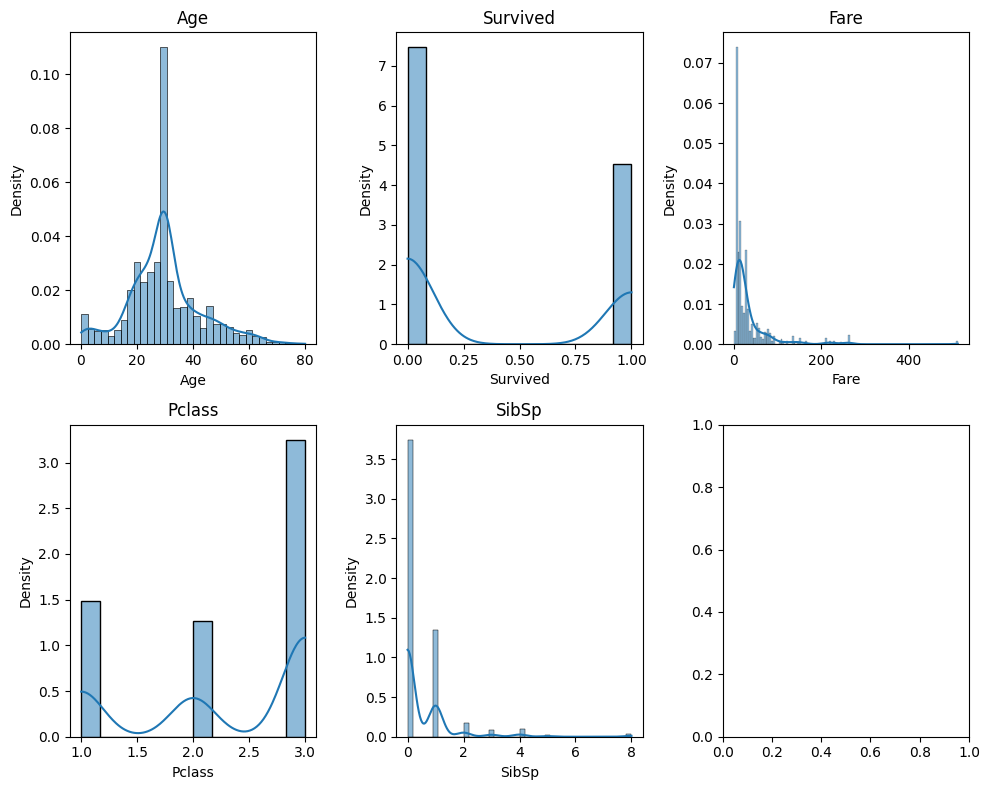

In [12]:
from scipy.stats import norm
df = data[['Age','Survived','Fare','Pclass','SibSp']]
df = pd.DataFrame(df)
def plot_hist_with_curve(data):
  num_cols = data.select_dtypes(include=['float64', 'int64']).columns
  num_rows = int(np.ceil(len(num_cols) / 3))
  fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 4 * num_rows))
  axes = axes.flatten()

  for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(data[col], kde=True, ax=ax, stat='density')
    ax.set_title(col)

  plt.tight_layout()
  plt.show()

# Pass the DataFrame 'data' directly to the function
plot_hist_with_curve(df)

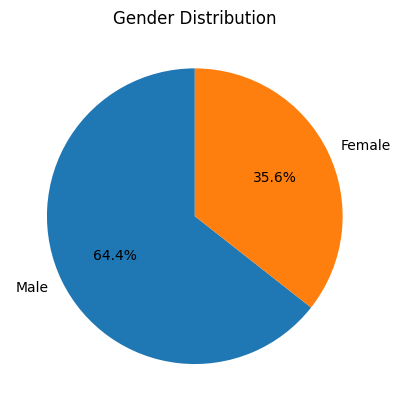

In [13]:
data['Gender'] = data['Sex'].map({'male': 0, 'female': 1})
Gender_counts = data['Gender'].value_counts()
plt.pie(Gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

In [14]:
table1 = pd.pivot_table(data, index = 'Sex', columns = 'Survived', values = 'PassengerId', aggfunc = 'count')
table1

Survived,0,1
Sex,,
female,81,385
male,734,109


In [15]:
table2 = pd.pivot_table(data, index = 'Pclass', columns = 'Survived', values = 'PassengerId', aggfunc = 'count')
table2

Survived,0,1
Pclass,,
1,137,186
2,160,117
3,518,191


In [16]:
table3 = pd.pivot_table(data, index = 'Embarked', columns = 'Survived', values = 'PassengerId', aggfunc = 'count')
table3

Survived,0,1
Embarked,,
C,137,133
Q,69,54
S,609,307


In [17]:
data['age_group'] = pd.cut(data['Age'], bins=[0, 18, 25, 35, 45, 55, 65, 80])

In [18]:
pd.pivot_table(data, index = 'age_group', columns = 'Survived' ,values = 'PassengerId', aggfunc = 'count')

Survived,0,1
age_group,,
"(0, 18]",99,94
"(18, 25]",164,86
"(25, 35]",354,190
"(35, 45]",103,64
"(45, 55]",57,39
"(55, 65]",30,19
"(65, 80]",8,2


In [19]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.020370 -0.038354  0.025731 -0.055224  0.008942   
Survived       -0.020370  1.000000 -0.264710 -0.048483  0.002370  0.108919   
Pclass         -0.038354 -0.264710  1.000000 -0.366371  0.060832  0.018322   
Age             0.025731 -0.048483 -0.366371  1.000000 -0.190747 -0.130872   
SibSp          -0.055224  0.002370  0.060832 -0.190747  1.000000  0.373587   
Parch           0.008942  0.108919  0.018322 -0.130872  0.373587  1.000000   
Fare            0.031416  0.233568 -0.558477  0.171521  0.160224  0.221522   
Gender         -0.013406  0.688371 -0.124617 -0.057397  0.109609  0.213125   

                 Fare    Gender  
PassengerId  0.031416 -0.013406  
Survived     0.233568  0.688371  
Pclass      -0.558477 -0.124617  
Age          0.171521 -0.057397  
SibSp        0.160224  0.109609  
Parch        0.221522  0.213125  
Fare         1.000000  0.185484  
Gender       0.185484  1.

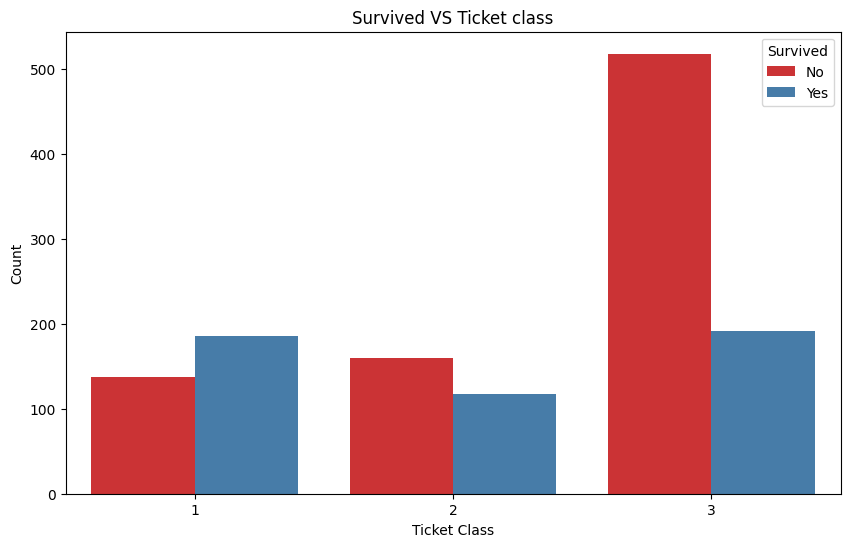

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set1')
plt.title('Survived VS Ticket class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

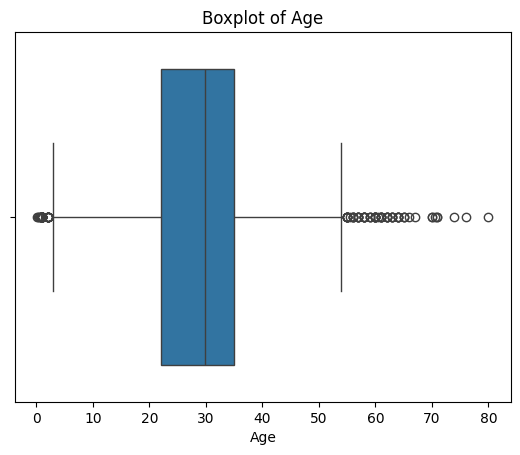

In [21]:
sns.boxplot(x='Age', data=data)
plt.title('Boxplot of Age')
plt.show()

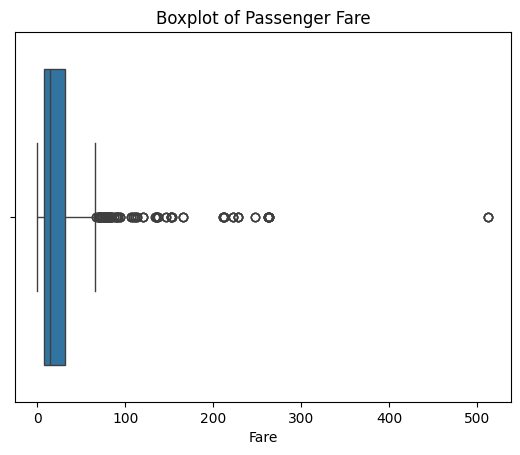

In [22]:
sns.boxplot(x='Fare', data=data)
plt.title('Boxplot of Passenger Fare')
plt.show()

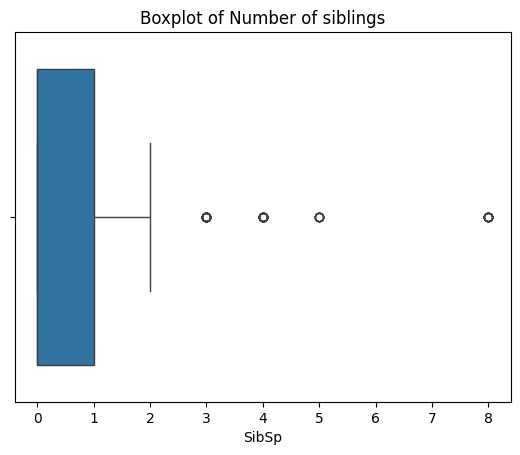

In [23]:
sns.boxplot(x='SibSp', data=data)
plt.title('Boxplot of Number of siblings')
plt.show()